<a href="https://colab.research.google.com/github/Rangulov/PhMathInfo/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Загрузка данных

In [ ]:
# используем Pandas read_csv():

dataset = pd.read_csv('earthquake_alert_balanced_dataset.csv')

# Анализ данных

Размер датасета, 1300 записей, 6 столбцов

In [ ]:
dataset.shape

(1300, 6)

Отображаем первые 10 сстрок датасета

In [ ]:
dataset.head(10)

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green
5,7.0,660.0,4.0,3.0,-13.0,green
6,6.8,630.0,1.0,3.0,-57.0,green
7,6.7,20.0,7.0,6.0,29.0,green
8,6.8,20.0,8.0,7.0,-101.0,yellow
9,7.6,26.0,9.0,8.0,7.0,yellow


magnitude - Магнитуда землетрясения (по шкале Рихтера)

depth - Глубина, на которой начинается очаг землетрясения (км)

cdi - Максимальная заявленная интенсивность

mmi - Максимальная расчетная инструментальная интенсивность

sig	- Комплексный показатель значимости, определяемый множеством факторов, включая магнитуду, максимальный MMI, сообщения о ощущениях и предполагаемое воздействие. Более высокие значения указывают на более значительные сейсмические события

alert	- Система классификации уровней оповещения о землетрясениях по категориям

*   green
*   yellow
*   orange
*   red





In [ ]:
import mpl_toolkits.mplot3d  # noqa: F401


from sklearn import datasets
from sklearn.cluster import KMeans

Выведем информацию о датасете, видим что ненулевых элементов нет.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


In [ ]:
dataset.describe()

,magnitude,depth,cdi,mmi,sig
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,7.061008,50.321538,6.976154,6.939231,-9.749231
std,0.423738,104.348286,2.244875,1.354774,62.245214
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.700000,12.000000,6.000000,6.000000,-54.000000
50%,7.000000,19.000000,8.000000,7.000000,-7.000000
75%,7.300000,38.000000,8.000000,8.000000,31.000000
max,8.600000,670.000000,9.000000,9.000000,127.000000


In [ ]:
dataset['alert'].unique()

array(['green', 'yellow', 'orange', 'red'], dtype=object)

In [ ]:
dataset['alert'].value_counts()

,count
alert,
green,325
yellow,325
orange,325
red,325


Видим, что набор данных сбалансированный. В каждом классе по 325 записей. Всего классов 4

# Визуализация данных

Скрипичный график дает понимание что в каждом классе есть все элементы.

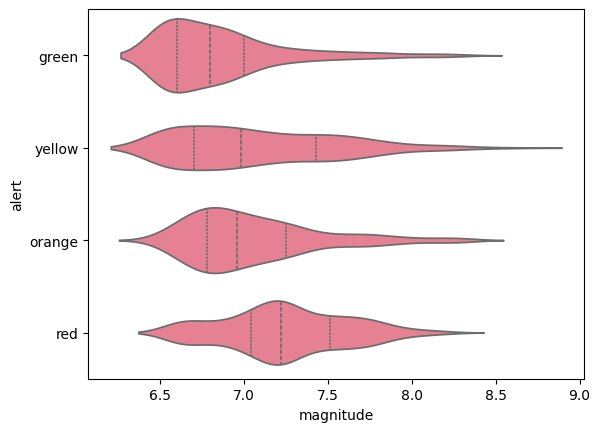

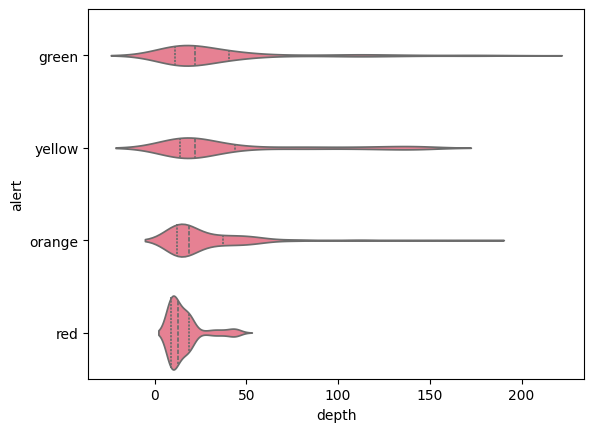

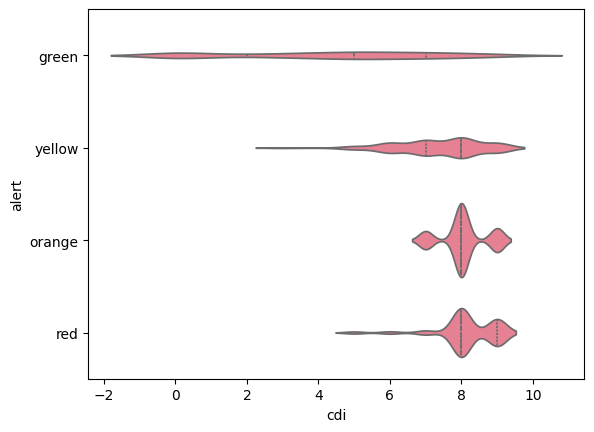

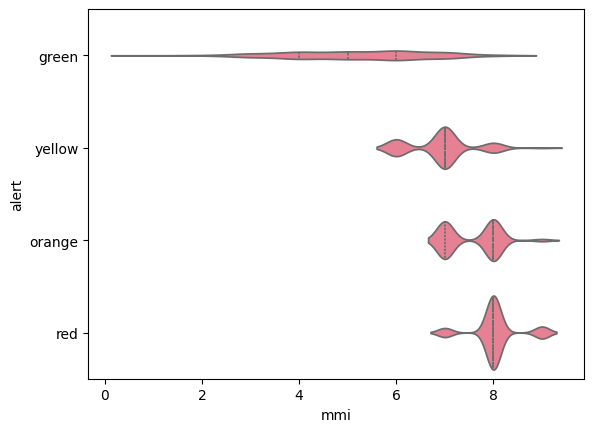

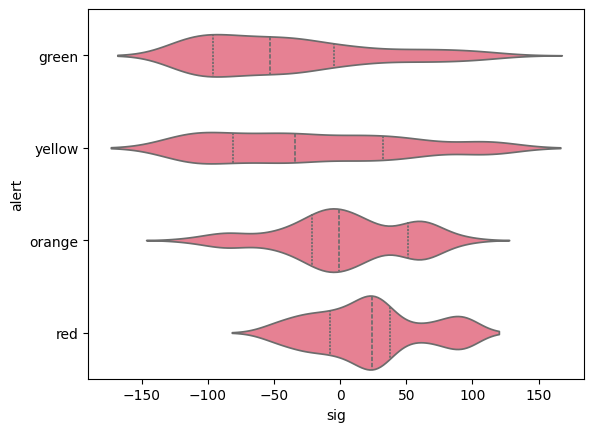

In [ ]:
sns.violinplot(y='alert', x="magnitude" ,data=dataset, inner='quartel')
plt.show()
sns.violinplot(y='alert', x='depth', data=dataset[dataset['depth']<200], inner='quartile')
plt.show()
sns.violinplot(y='alert', x='cdi', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='alert', x='mmi', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='alert', x='sig', data=dataset, inner='quartile')
plt.show()

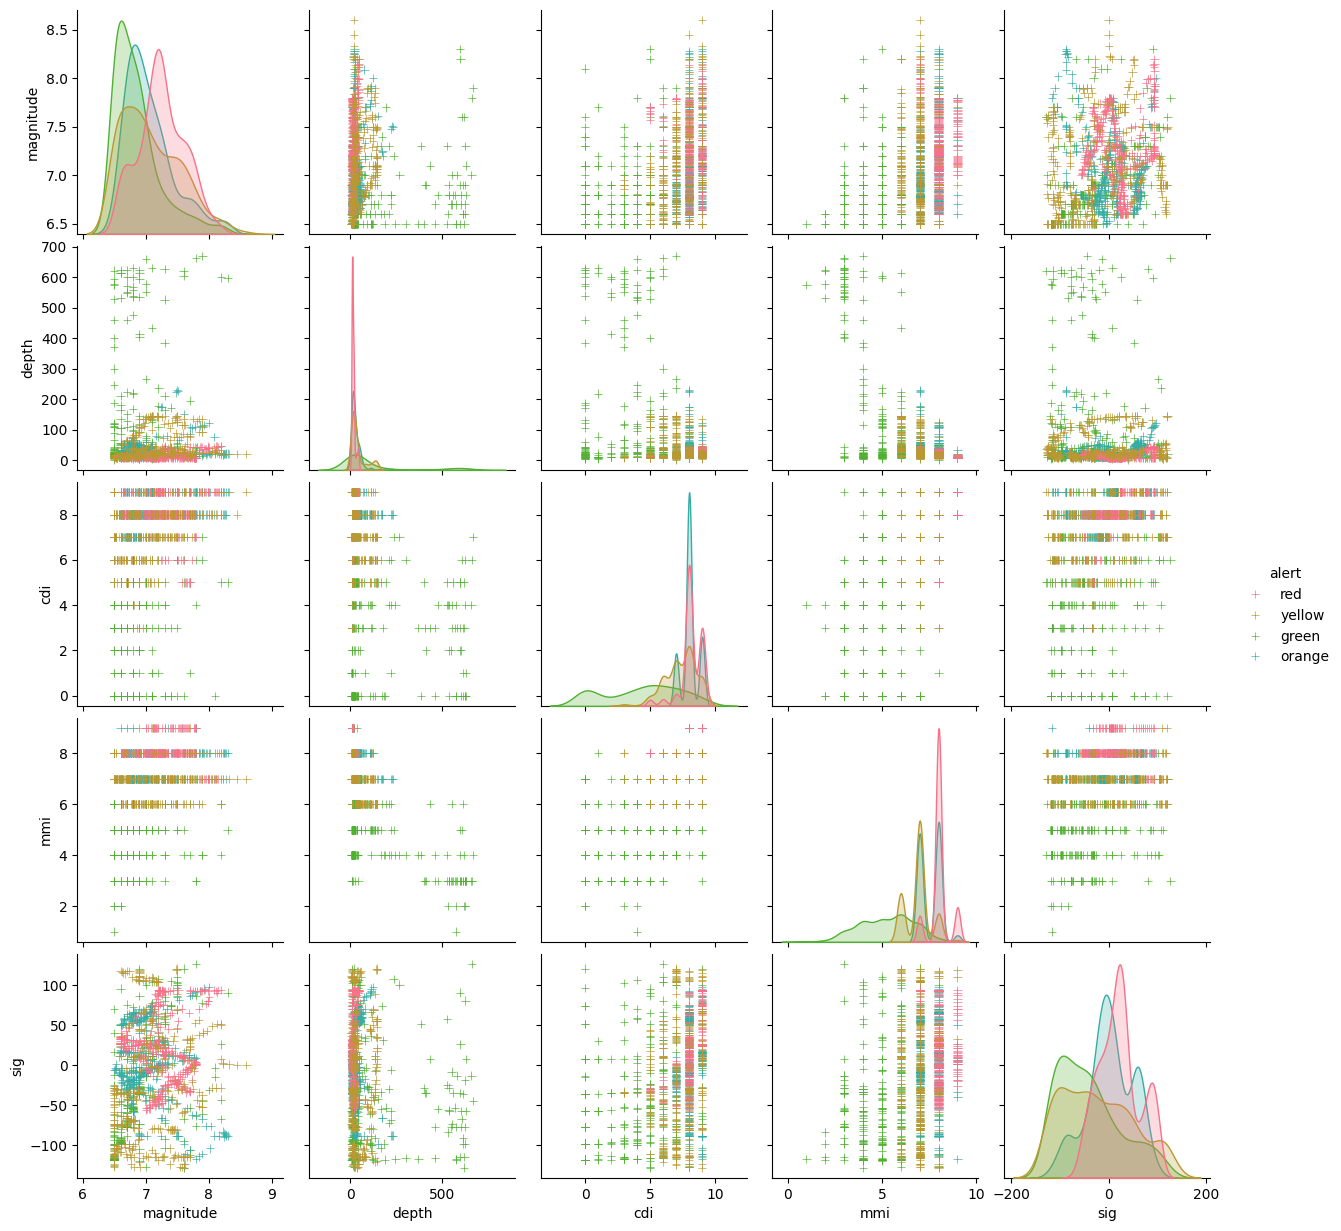

In [ ]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

sns.pairplot(dataset, hue='alert', markers='+', hue_order = ['red', 'yellow', 'green', 'orange'])
plt.show()

Видим, что green отличается от всех других видов по всем признакам.

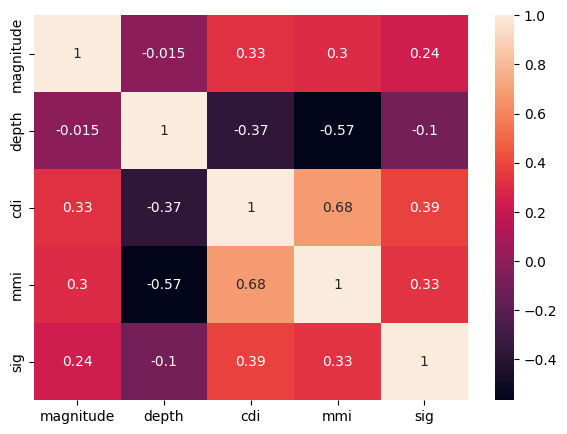

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец alert.

В X складываем весь набор данных без целевой переменной.


In [ ]:
X = dataset.drop(['alert'], axis=1)
y = dataset['alert']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (1300, 5) | y shape: (1300,) 


X имеет 1300 строк и 5 столбцов, тогда как Y имеет 1300 строк и только один столбец.


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [ ]:
import scipy.stats as stats

y_mapped = y.map({'green': 0, 'yellow': 1, 'orange': 2, 'red': 3})

# почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.30, shuffle=True)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=np.float64(-1.190663554552916), pvalue=np.float64(0.2340033906201057), df=np.float64(1298.0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), df=np.float64(1298.0))

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.636538 (0.041868)
LDA: 0.591346 (0.056926)
KNN: 0.725000 (0.047730)
CART: 0.855769 (0.040567)
NB: 0.656731 (0.028540)
SVC: 0.760577 (0.044158)


Classification and Regression Trees (CART) классификатор показал лучшую метрику среди всех алгоритмов.

Давайте обучим модель CART на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели
Определяем нашу модель CART
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [ ]:
sk_cart = DecisionTreeClassifier()
sk_cart.fit(X_train, y_train)
sk_cart_pred_res = sk_cart.predict(X_test)
sk_cart_accuracy = accuracy_score(y_test, sk_cart_pred_res)

print(f'sk LDA accuracy: {sk_cart_accuracy}')
print(f'sk LDA prediction: {sk_cart_pred_res}')

sk LDA accuracy: 0.8961538461538462
sk LDA prediction: [1 0 0 1 1 3 1 2 2 0 0 0 2 0 3 3 3 0 3 3 1 0 0 0 3 1 0 3 3 2 1 2 0 2 1 0 0
 3 1 3 1 2 0 0 2 0 1 1 3 3 3 3 0 3 2 1 0 1 0 3 3 2 2 1 2 3 1 1 2 0 3 2 1 3
 1 0 2 3 2 0 3 1 0 2 2 3 1 0 2 1 2 2 2 1 2 2 2 3 2 2 3 2 1 0 2 2 1 1 1 3 0
 2 1 0 3 3 2 2 2 3 2 3 1 3 0 3 1 3 2 3 3 2 0 2 2 1 3 1 2 2 1 0 3 2 2 1 1 0
 1 2 2 1 3 3 1 0 1 3 0 1 0 1 1 1 0 1 1 0 2 1 2 2 0 2 3 3 2 3 3 3 2 1 1 3 0
 0 3 1 2 3 0 2 1 3 1 0 0 2 3 3 2 2 2 1 2 1 0 1 0 1 2 3 2 1 1 1 2 1 2 3 1 0
 1 1 0 0 0 2 0 0 3 0 1 3 0 3 0 3 0 1 3 3 1 1 3 0 3 0 0 0 0 3 0 3 2 3 0 2 2
 1]


## Визуализация решения

/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: title={'center': 'LDA surface with original features'}>

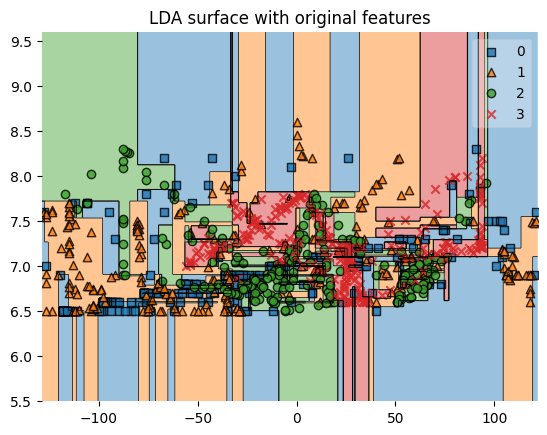

In [ ]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2,3 соответственно
#y_s = y_train.map({'green': 0, 'yellow': 1, 'orange': 2, 'red': 3})
y_s = y_train
X_2d= X_train[['sig',	'magnitude']].values

y_2d = y_s.values


sk_lda1 = DecisionTreeClassifier()
sk_lda1.fit(X_2d, y_2d)



plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

ValueError: X must be a NumPy array. Found <class 'sklearn.tree._classes.DecisionTreeClassifier'>

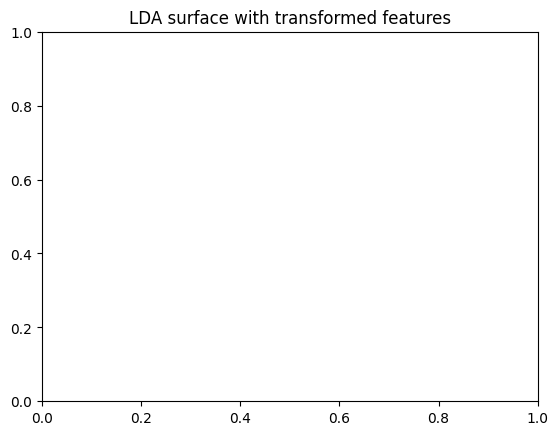

In [ ]:
df = dataset["alert"].map({'green': 0, 'yellow': 1, 'orange': 2, 'red': 3})

Xs = dataset[['sig',	'magnitude']]
ys = df.values

sk_lda2 = DecisionTreeClassifier()
X1_lda = sk_lda2.fit(Xs, ys)

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(Xs, ys, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)

plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2)

In [ ]:
predicted = sk_lda2.predict(X1_lda_test)


ValueError: X has 3 features, but DecisionTreeClassifier is expecting 2 features as input.

In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y1_test, predicted)#Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.63
Precision (confidence when predicting a 1): 0.63
Detail:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        70
           1       0.58      0.66      0.62        85
           2       0.51      0.33      0.40        88
           3       0.62      0.82      0.71        82

    accuracy                           0.63       325
   macro avg       0.64      0.64      0.63       325
weighted avg       0.63      0.63      0.62       325

